In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    discharged = df.recovered+df.deaths
    hospitalized = df.confirmed - discharged
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(discharged,dashes=[2,2,6, 2],c='y',label='discharged')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('discharged: ',discharged.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/discharged.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('discharged')
    plt.ylabel('deaths')
    plt.show()


In [3]:
# for c in json.columns:
#     print(c)

      date  confirmed  deaths  recovered
 2020-4-13       2579      40       1288
new  confirmed
      28.0


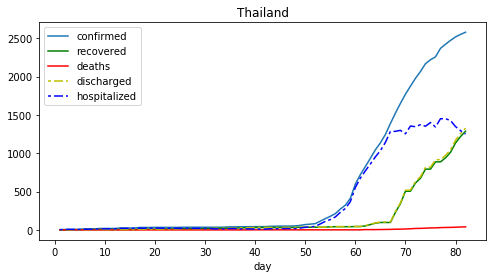

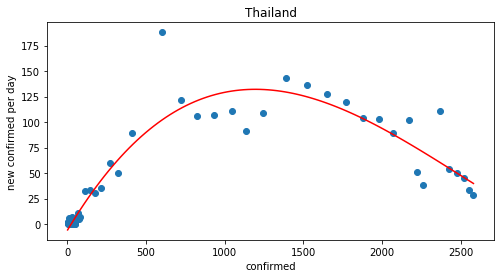

discharged:  1328
deaths:  40
%:  3.0120481927710845


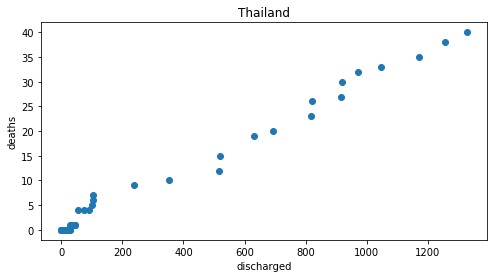

      date  confirmed  deaths  recovered
 2020-4-13       4817      77       2276
new  confirmed
     134.0


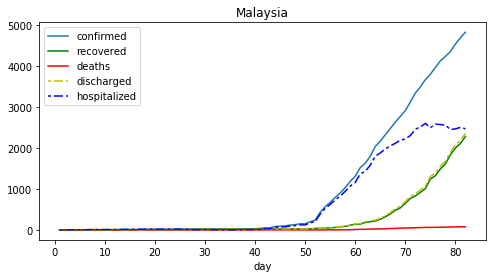

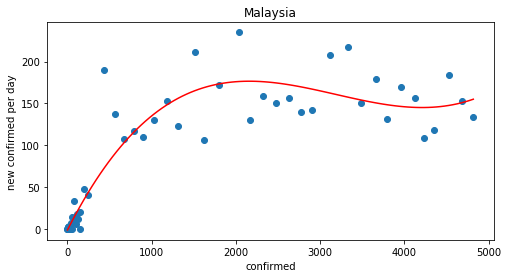

discharged:  2353
deaths:  77
%:  3.2724181895452613


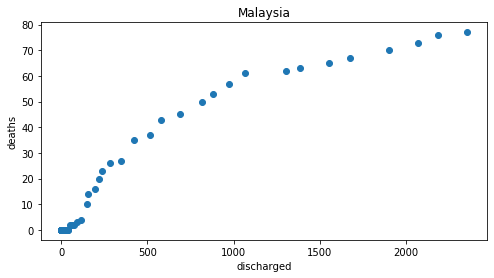

      date  confirmed  deaths  recovered
 2020-4-13       2918       9        586
new  confirmed
     386.0


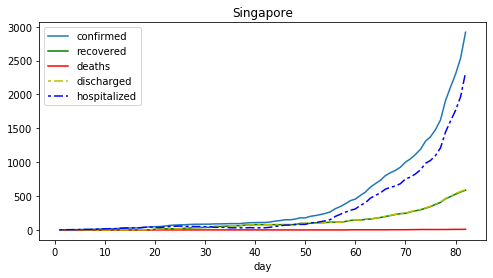

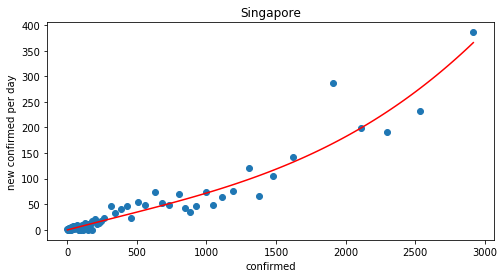

discharged:  595
deaths:  9
%:  1.5126050420168067


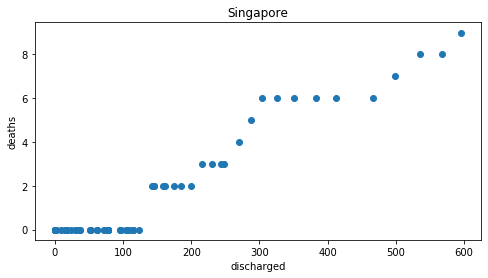

      date  confirmed  deaths  recovered
 2020-4-13       4557     399        380
new  confirmed
     316.0


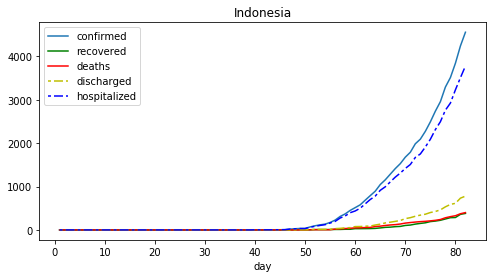

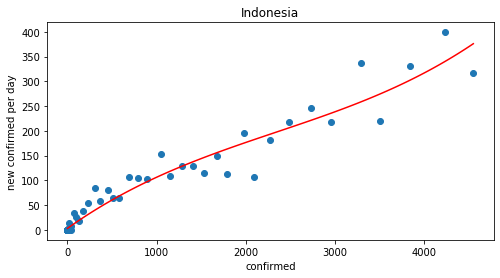

discharged:  779
deaths:  399
%:  51.21951219512195


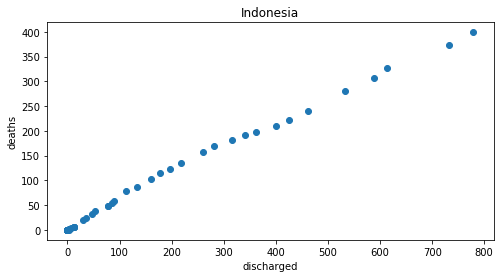

      date  confirmed  deaths  recovered
 2020-4-13     580619   23529      43482
new  confirmed
   25306.0


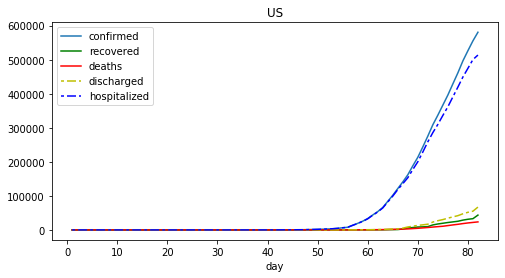

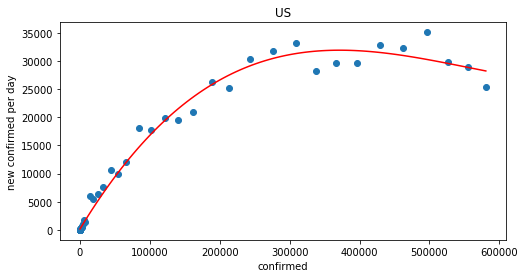

discharged:  67011
deaths:  23529
%:  35.112145767112864


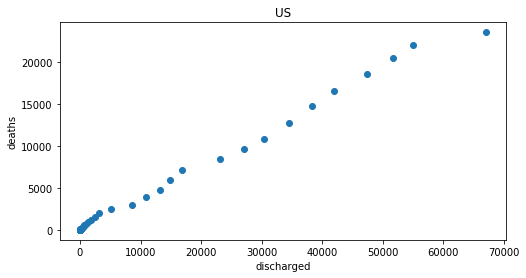

      date  confirmed  deaths  recovered
 2020-4-13      83213    3345      78039
new  confirmed
      79.0


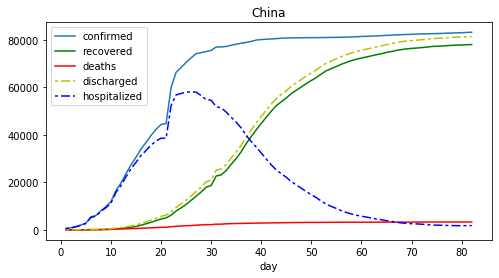

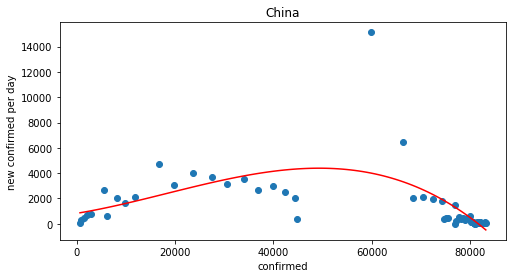

discharged:  81384
deaths:  3345
%:  4.11014450014745


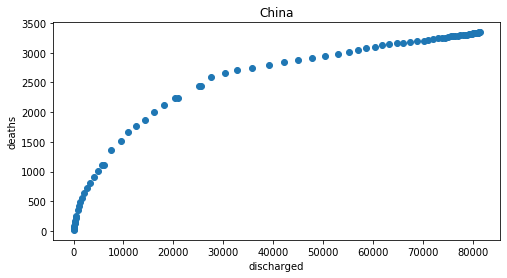

      date  confirmed  deaths  recovered
 2020-4-13      10537     217       7447
new  confirmed
      25.0


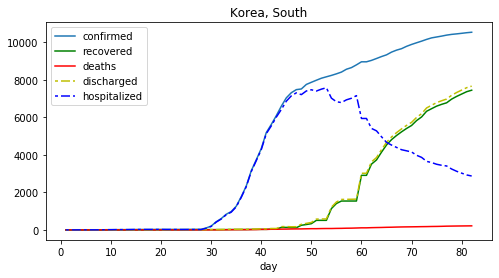

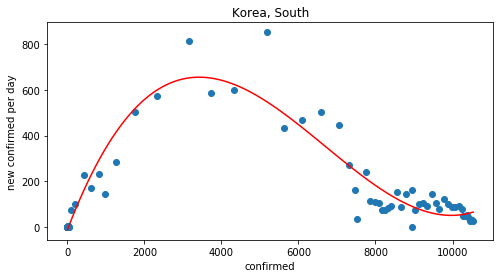

discharged:  7664
deaths:  217
%:  2.831419624217119


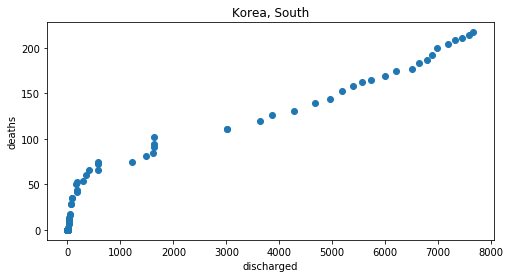

      date  confirmed  deaths  recovered
 2020-4-13     159516   20465      35435
new  confirmed
    3153.0


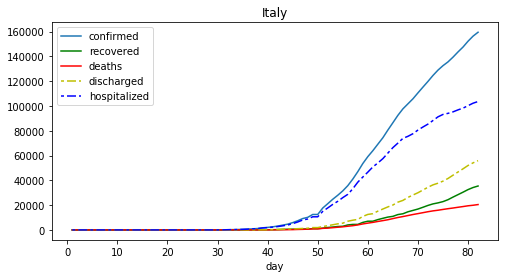

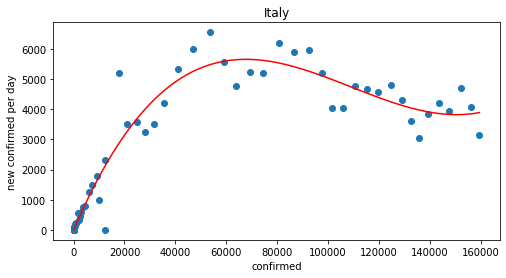

discharged:  55900
deaths:  20465
%:  36.61001788908766


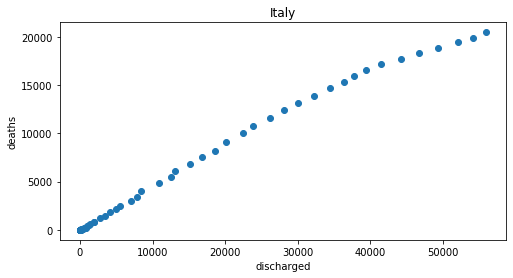

      date  confirmed  deaths  recovered
 2020-4-13     170099   17756      64727
new  confirmed
    3268.0


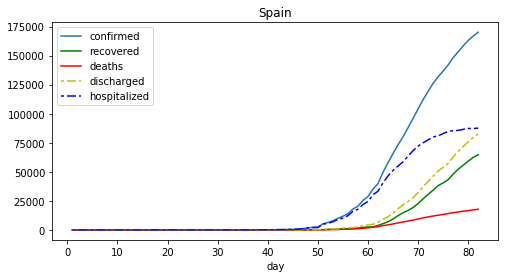

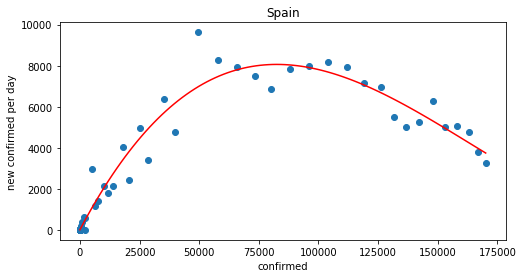

discharged:  82483
deaths:  17756
%:  21.526860080258963


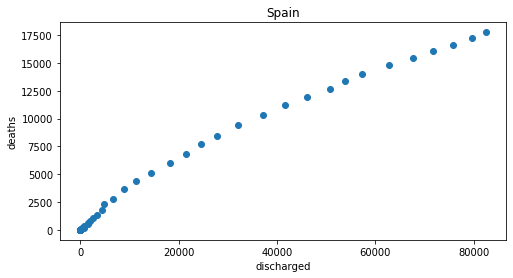

In [4]:
for c in ['Thailand','Malaysia','Singapore','Indonesia','US','China','Korea, South','Italy','Spain']:
    plot_country(c)
